In [1]:
import pandas as pd
import numpy as np
import panel as pn
import matplotlib.pyplot as plt
pn.extension()
import hvplot.pandas
import io
import seaborn as sns



In [35]:
df = pd.read_csv('F:\Thomas Tatum\Documents\Grad School\intern\Dev\Data\\noAge.csv', header='infer', index_col=[0], low_memory=False)
# train = df.head(10000)

nonulls = df.where(df['event_type']>0)
df = nonulls.dropna()
# df = df.astype('category')
df.dtypes
finalDat = df[['nature_of_inj','part_of_body','src_of_injury','event_type','evn_factor','hum_factor','fatality']]
finalDat = finalDat.astype('category')
finalDat['fatality'] = finalDat['fatality'].astype('object')


nature_of_inj
1.0       668.0
2.0      5114.0
3.0      3381.0
4.0       435.0
5.0      3018.0
6.0      5193.0
7.0      1253.0
8.0         6.0
9.0       149.0
10.0     6392.0
11.0       39.0
12.0     9283.0
13.0       40.0
14.0       39.0
15.0      331.0
16.0       15.0
17.0      353.0
18.0      634.0
19.0        9.0
20.0      321.0
21.0    20282.0
22.0      128.0
Name: fatality, dtype: object

part_of_body
1.0      1613.0
2.0       614.0
3.0       945.0
4.0     11586.0
5.0      5898.0
6.0        51.0
7.0        42.0
8.0        68.0
9.0       394.0
10.0      165.0
11.0      323.0
12.0     1126.0
13.0    14417.0
14.0      298.0
15.0      103.0
16.0      715.0
17.0      122.0
18.0      161.0
19.0    10360.0
20.0     1264.0
21.0      223.0
22.0       98.0
23.0       88.0
24.0       34.0
25.0      214.0
26.0       17.0
27.0      108.0
28.0     1961.0
29.0      416.0
30.0       28.0
31.0     3631.0
Name: fatality, dtype: object

src_of_injury
1.0      112.0
2.0      424.0
3.0      124.0
4.0      199.0
5.0     1861.0
6.0      301.0
7.0      451.0
8.0     3773.0
9.0     1324.0
10.0      41.0
11.0      34.0
12.0    1403.0
13.0     101.0
14.0     182.0
15.0    5929.0
16.0    2639.0
17.0      27.0
18.0      43.0
19.0    1074.0
20.0      66.0
21.0     198.0
22.0     140.0
23.0     486.0
24.0    2472.0
25.0    1328.0
26.0    3333.0
27.0    4654.0
28.0     915.0
29.0    4308.0
30.0    3606.0
31.0      40.0
32.0     203.0
33.0     357.0
34.0     194.0
35.0     366.0
36.0      91.0
37.0       4.0
38.0     388.0
39.0     671.0
40.0     139.0
41.0    1015.0
42.0    3862.0
43.0    8002.0
44.0      87.0
45.0       8.0
46.0      26.0
47.0      19.0
48.0      63.0
Name: fatality, dtype: object

event_type
1.0     16326.0
2.0      9002.0
3.0        66.0
4.0       676.0
5.0     11815.0
6.0      1665.0
7.0        87.0
8.0      2606.0
9.0       149.0
10.0      151.0
11.0       92.0
12.0     3193.0
13.0     5228.0
14.0     6027.0
Name: fatality, dtype: object

evn_factor
1.0      1560.0
2.0       837.0
3.0       298.0
4.0      3535.0
5.0      2480.0
6.0      7099.0
7.0      3179.0
8.0      6389.0
9.0       777.0
10.0     1235.0
11.0      725.0
12.0       33.0
13.0     9516.0
14.0      289.0
15.0      703.0
16.0       78.0
17.0      957.0
18.0    17393.0
Name: fatality, dtype: object

hum_factor
1.0     20648.0
2.0        70.0
3.0        10.0
4.0      3204.0
5.0       296.0
6.0      3258.0
7.0       361.0
8.0       780.0
9.0      3706.0
10.0     2878.0
11.0     2724.0
12.0      711.0
13.0     1486.0
14.0    10868.0
15.0      174.0
16.0      130.0
17.0     1575.0
18.0     2044.0
19.0      293.0
20.0     1867.0
Name: fatality, dtype: object

fatality
0.0        0.0
1.0    57083.0
Name: fatality, dtype: object

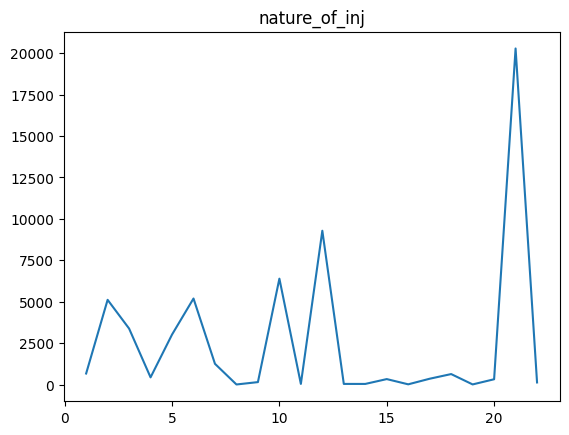

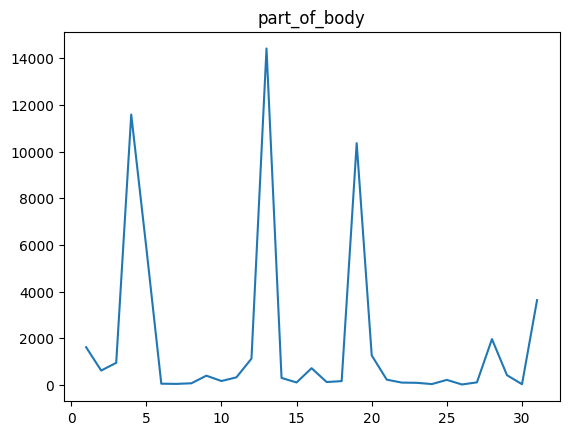

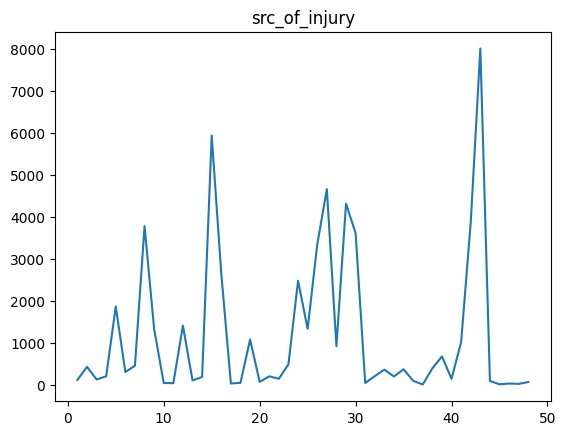

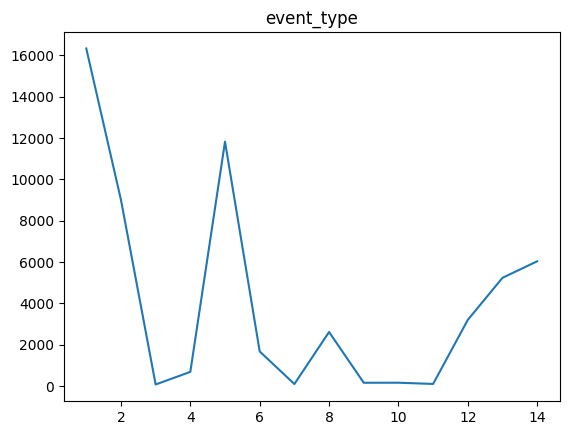

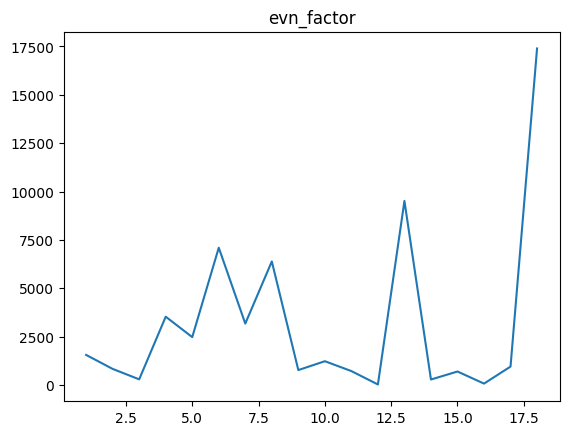

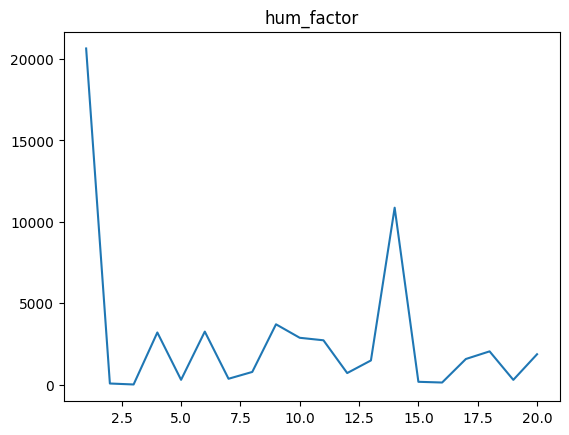

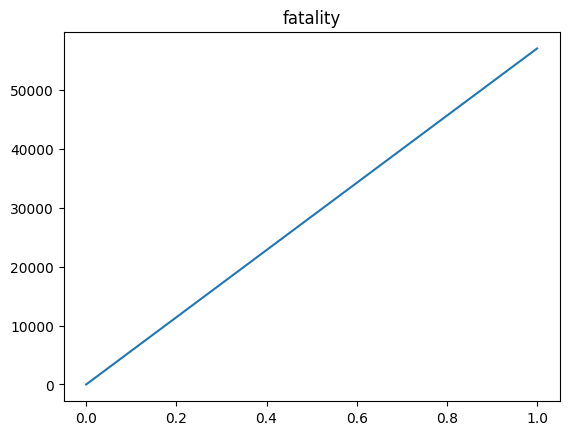

In [75]:
for col in finalDat:
    plt.figure()
    plt.plot(finalDat.groupby(col)['fatality'].agg(sum))
    plt.title(col)
    display(finalDat.groupby(col)['fatality'].agg(sum))

In [81]:
# defining filter params to ID high risk situations. 

arbCountvar = 3000

testdict = dict()
for col in finalDat:
    test = []
    val = finalDat.groupby(col)['fatality'].agg(sum).astype('object')
    dic = val.to_dict()
    for i in dic:
        if val[i] > arbCountvar:
            test.append(i)
    testdict.__setitem__(col, test)
testdict['nature_of_inj']
testdict.keys()


dict_keys(['nature_of_inj', 'part_of_body', 'src_of_injury', 'event_type', 'evn_factor', 'hum_factor', 'fatality'])

In [105]:
# finalDat.loc[(finalDat[list(testdict)] == pd.Series(testdict)).all(axis=1)]
df1 = finalDat
filter_v = testdict
##Start with array of all True
ind = [True] * len(df1)

##Loop through filters, updating index
for col, vals in filter_v.items():
    ind = ind & (df1[col].isin(vals))

highrisk = df1[ind]
highrisk = highrisk.drop('fatality', axis=1)
highrisk = highrisk.astype('int')

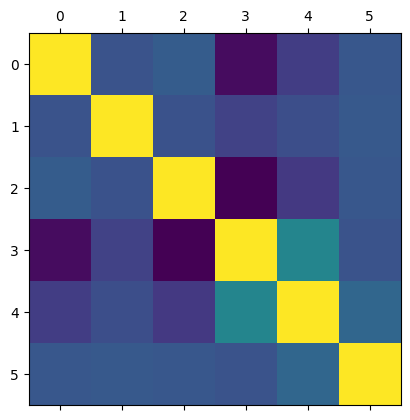

In [109]:
matrix = highrisk.corr()
plt.matshow(matrix)